# Sound Directionality Test
## Shantanu Laghate - 1/27/20

Reference: http://www.diva-portal.org/smash/get/diva2:830430/FULLTEXT01.pdf section 3 - trigonometric solution

Sound Source: https://www.youtube.com/watch?v=2gxuIfNeTTE

In [12]:
import numpy as np
from scipy.io import wavfile
import matplotlib.pyplot as plt

%matplotlib inline

Assume that the distance between microphones is $30 cm = 0.3m$. This makes $x_b = 0.15$.

Assume that $ c = 343 m/s $

We need to first find $\tau$, and then $AB' = \tau \cdot c$

$$ y = \sqrt{ \frac{AB'^2}{4} - x_B^2 + x^2(\frac{4x_b^2}{AB'^2} - 1)} $$

Since $$ AB \leq 2 * x_B$$
We get $$ \tau \leq \frac{2*x_B}{c} = \frac{2*0.15}{343} = 874\mu s$$ 



In [52]:
def y(AB, x, xb = 0.15):
    try:
        yy = np.sqrt(AB**2/4 - xb**2 + x**2 * (4*xb**2/AB**2 - 1))
        return yy
    except Exception:
        return np.nan

def negy(AB, x, xb = 0.15):
    return -y(AB, xb, x)


c = 343




## Test 1 (don't use this, keep scrolling to Test 2)
The original beep starts at 0.80870 seconds. 

Let's delay it by 500 us to start at 0.80920 seconds.

In [64]:
filenameA = "./sounds/Beep.wav"
filenameB = "./sounds/Beep_delay_500us.wav"

(rateA, dataA) = wavfile.read(filenameA)
(rateB, dataB) = wavfile.read(filenameB)

(rateA, dataA, rateB, dataB)

(48000,
 array([-1,  2, -2, ...,  2, -2,  1], dtype=int16),
 48000,
 array([ 1, -2,  3, ...,  1,  0, -1], dtype=int16))

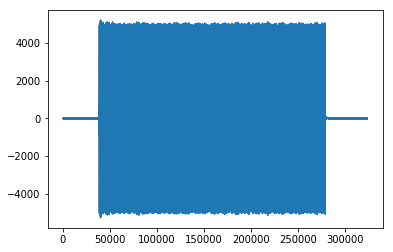

In [54]:
plt.plot(dataA)

In [55]:
# find first point where the beep starts
# primitive method to find tau - basic threshold based system
locA = np.argmax((dataA > 100 )|( dataA < -100))
locB = np.argmax((dataB > 100 )|( dataB < -100))
locA, locB

(38818, 38839)

In [56]:
tau = (locB - locA)/rateA
tau

# not super accurate, but this works

0.0004375

In [57]:
1/rateA
# its about 3 samples off, seems reasonable.

2.0833333333333333e-05

In [58]:
AB = tau*c
AB

0.15006250000000002

C:\Users\shant\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


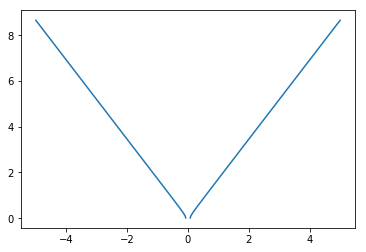

In [59]:
xxx = np.linspace(-5, 5, 10000)
yyy = y(AB, xxx)

plt.plot(xxx, yyy)

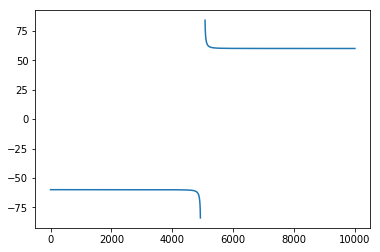

In [47]:
plt.plot(np.degrees(np.arctan(np.gradient(yyy, xxx))))

In [48]:
# The approximate angle is -60 degrees from straight
np.degrees(np.arctan(np.gradient(yyy, xxx)))

array([-59.98901082, -59.98901138, -59.9890125 , ...,  59.9890125 ,
        59.98901138,  59.98901082])

## Test 2
The original beep starts at 0.80870 seconds. 

Let's delay it by 850 us to start at 0.80955 seconds.

In [67]:
def anglefromfiles(delayA, delayB):
    # put these names in
    # depending on which mic you want to test
    filenameA = "./sounds/Beep_delay_" + str(delayA) + "us.wav"
    filenameB = "./sounds/Beep_delay_" + str(delayB) + "us.wav"

    (rateA, dataA) = wavfile.read(filenameA)
    (rateB, dataB) = wavfile.read(filenameB)

    # find first point where the beep starts
    # primitive method to find tau - basic threshold based system
    locA = np.argmax((dataA > 100 )|( dataA < -100))
    locB = np.argmax((dataB > 100 )|( dataB < -100))

    tau = (locB - locA)/rateA
    print("tau=", tau)
    AB = tau*c
    print("AB=", AB)

    xxx = np.linspace(-5, 5, 10000)
    yyy = y(AB, xxx)

    plt.plot(xxx, yyy)
    plt.show()

    # The approximate angle is -12 degrees from straight
    degs = np.degrees(np.arctan(np.gradient(yyy, xxx)))

    # sound hits B after A, left quadrant
    if tau > 0:
        angle = -(90 - degs[-1])
    else:
        # right quadrant
        angle = 90 - degs[-1]


    print(angle, " degrees from center")
    return angle

tau= 0.0008541666666666667
AB= 0.2929791666666667


C:\Users\shant\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in sqrt
  


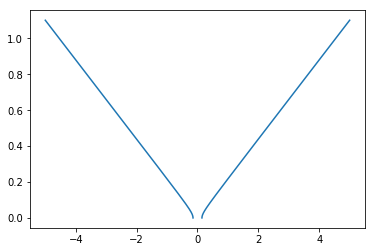

-77.57482007847159  degrees from center
tau= 0.0008125
AB= 0.2786875


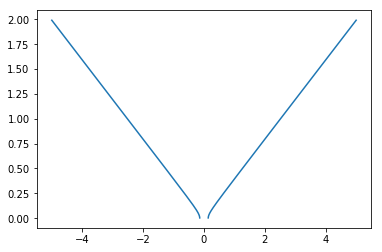

-68.26535909748002  degrees from center
tau= 0.0007083333333333334
AB= 0.24295833333333336


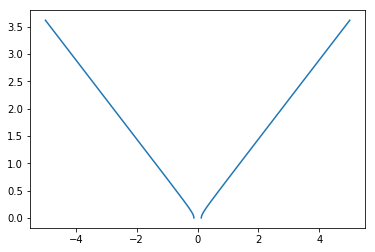

-54.074325594927444  degrees from center
tau= 0.0006041666666666667
AB= 0.2072291666666667


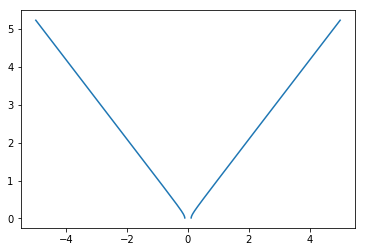

-43.684460388555095  degrees from center
tau= 0.0004375
AB= 0.15006250000000002


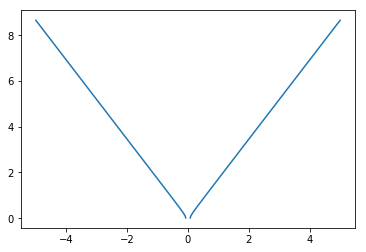

-30.01098918003617  degrees from center
tau= 0.0004166666666666667
AB= 0.14291666666666666


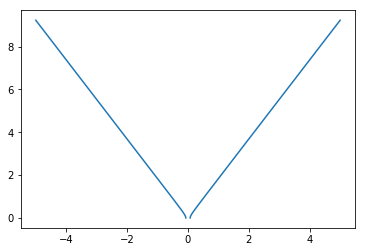

-28.44736745591038  degrees from center
tau= 0.0003125
AB= 0.1071875


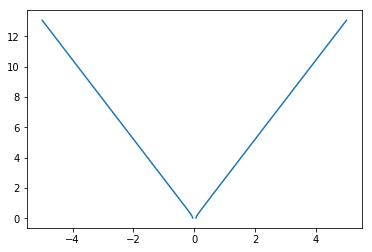

-20.932862241656935  degrees from center
tau= 0.00020833333333333335
AB= 0.07145833333333333


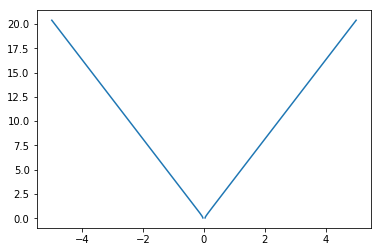

-13.779660996005717  degrees from center
tau= 4.1666666666666665e-05
AB= 0.014291666666666666


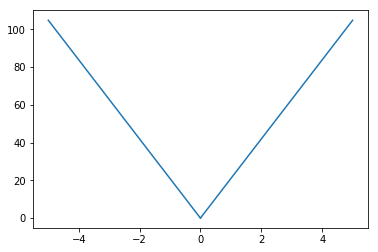

-2.730537964522725  degrees from center
tau= 6.25e-05
AB= 0.0214375


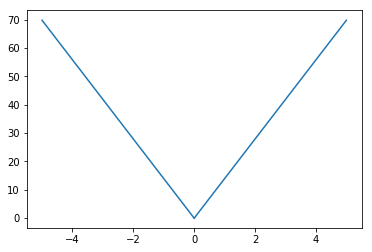

-4.097743972547562  degrees from center
tau= 0.0
AB= 0.0


C:\Users\shant\Miniconda3\lib\site-packages\ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in double_scalars
  


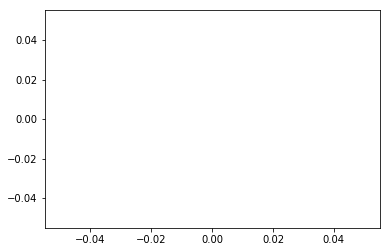

nan  degrees from center
tau= -6.25e-05
AB= -0.0214375


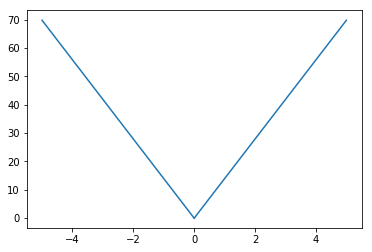

4.097743972547562  degrees from center
tau= -4.1666666666666665e-05
AB= -0.014291666666666666


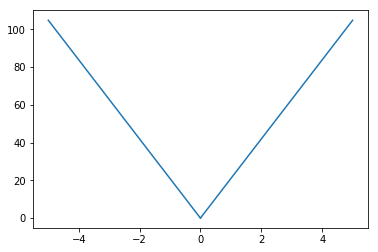

2.730537964522725  degrees from center
tau= -0.00020833333333333335
AB= -0.07145833333333333


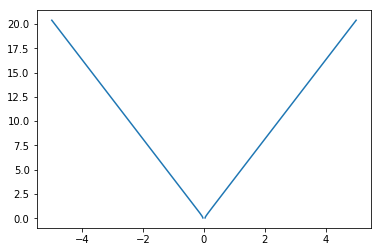

13.779660996005717  degrees from center
tau= -0.0003125
AB= -0.1071875


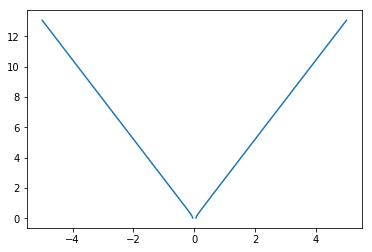

20.932862241656935  degrees from center
tau= -0.0004166666666666667
AB= -0.14291666666666666


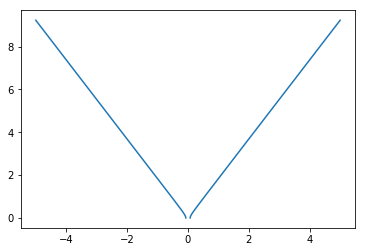

28.44736745591038  degrees from center
tau= -0.0004375
AB= -0.15006250000000002


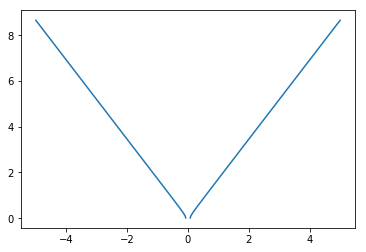

30.01098918003617  degrees from center
tau= -0.0006041666666666667
AB= -0.2072291666666667


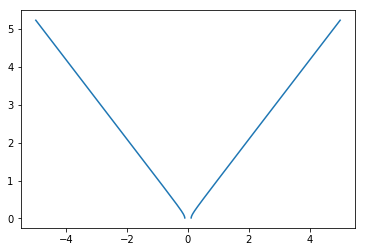

43.684460388555095  degrees from center
tau= -0.0007083333333333334
AB= -0.24295833333333336


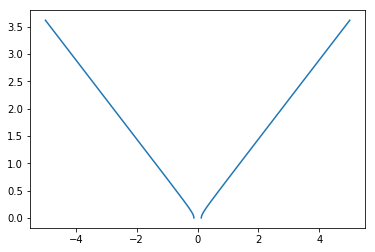

54.074325594927444  degrees from center
tau= -0.0008125
AB= -0.2786875


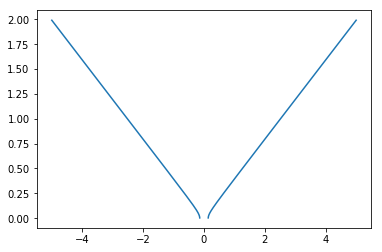

68.26535909748002  degrees from center
tau= -0.0008541666666666667
AB= -0.2929791666666667


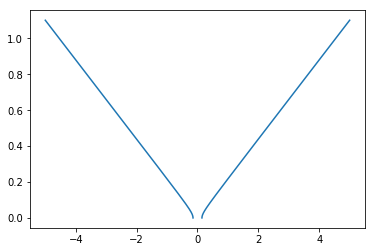

77.57482007847159  degrees from center


In [70]:
delays = [850, 800, 700, 600, 500, 400, 300, 200, 100, 50, 0, -50, -100, -200, -300, -400, -500, -600, -700, -800, -850]
angles = []
for delay in delays:
    if delay < 0:
        angles.append(anglefromfiles(delayA=-delay, delayB=0))
    else:
        angles.append(anglefromfiles(delayA=0, delayB=delay))



Text(0.5, 1.0, 'Angle vs Delay')

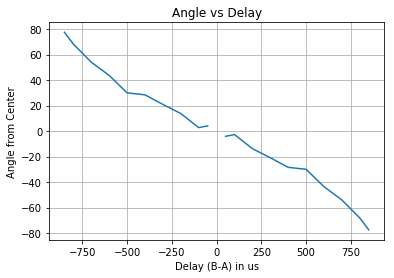

In [78]:
plt.plot(delays, angles)
plt.xlabel("Delay (B-A) in us")
plt.ylabel("Angle from Center")
plt.grid()
plt.title("Angle vs Delay")